<h1 style="text-align:center; font-weight:bold"> Classification des nuages </h1>

# 1 - Statistiques sur les données d'entrée

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train_classes = pd.read_csv("data/dataset/train/_classes.csv")
train_classes

,filename,altocumulus,altostratus,cirrocumulus,cirrostratus,cirrus,cumulonimbus,cumulus,nimbostratus,stratocumulus,stratus
0,Cb-N203_jpg.rf.eedff9fa0d468da939b1e626325c417...,0,0,0,0,0,1,0,0,0,0
1,Sc-89-_jpg.rf.eedbfdfee150f3dc414e6731e77b7df8...,0,0,0,0,0,0,0,0,1,0
2,Ns-N036_jpg.rf.ee277122a996efb89fd3a247bd91442...,0,0,0,0,0,0,0,1,0,0
3,Ci-N022_jpg.rf.f14a1141448b1a0ff8b22f3babb3677...,0,0,0,0,1,0,0,0,0,0
4,Ci-N009_jpg.rf.f0e6d8c370e4c9d81b20438a49da165...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1497,Cc-N061_jpg.rf.6709ff5fa4e1ea997cbb346d38ea881...,0,0,1,0,0,0,0,0,0,0
1498,As-N062_jpg.rf.674adcbe5ebc472e69e3fddcfa84683...,0,1,0,0,0,0,0,0,0,0
1499,Ci-N002_jpg.rf.6a0c1017ee63d2f9eea00dc5a5b7a85...,0,0,0,0,1,0,0,0,0,0
1500,Ns-N160_jpg.rf.6ae16072327e987bce6604ede0fa393...,0,0,0,0,0,0,0,1,0,0


In [ ]:
col_sum = train_classes.iloc[:, 1:].sum(axis=0)
col_sum

altocumulus      150
altostratus      144
cirrocumulus     144
cirrostratus     144
cirrus           142
cumulonimbus     150
cumulus          156
nimbostratus     160
stratocumulus    166
stratus          146
dtype: int64

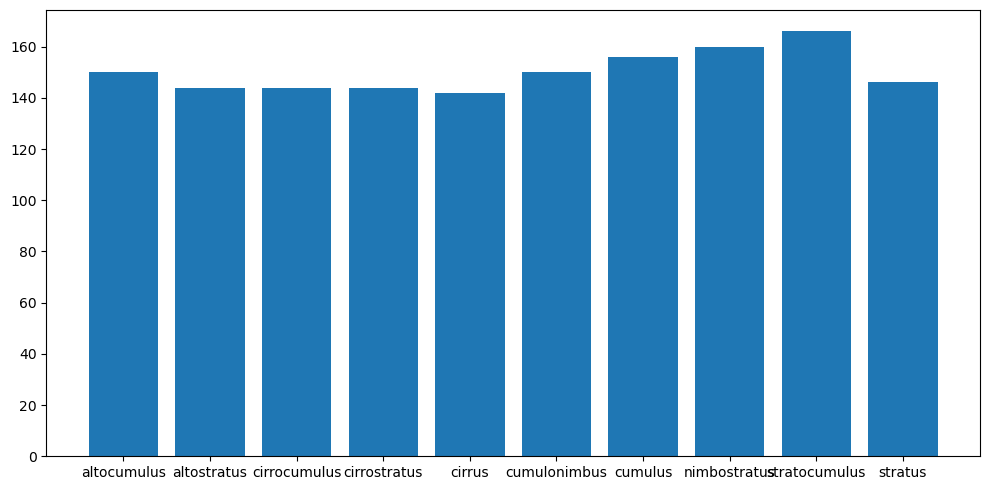

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(col_sum.index, col_sum.values)
plt.tight_layout()

# 2 - LLM

In [15]:
import datetime
import sys

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import requests
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras.models import Model

Shape of the image (640, 640, 3)


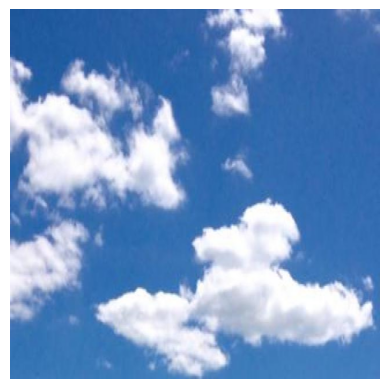

In [ ]:
image_array_nuage = cv2.imread(
    "../data/dataset/train/793a3988-6acf-46da-847a-b306148ad932_jpg.rf.10c7dab5c62137fb63087a01149937f5.jpg"
)
print(f"Shape of the image {image_array_nuage.shape}")
plt.axis("off")
plt.imshow(
    cv2.cvtColor(image_array_nuage, cv2.COLOR_BGR2RGB)
)  # opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()


(640, 640)
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000 

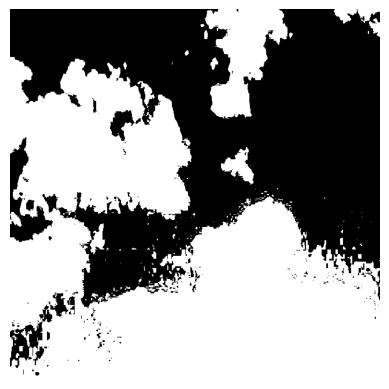

In [ ]:
res = cv2.cvtColor(image_array_nuage, cv2.COLOR_RGB2GRAY)  # TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0, 640):
    for col in range(0, 640):
        print("%03d " % d[row][col], end=" ")
    print("")
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

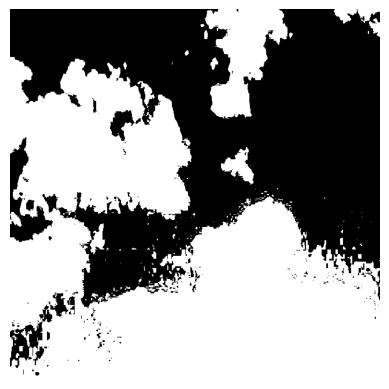

In [ ]:
# Convert to bw
(thresh, img_bw) = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)
plt.axis("off")
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

[[0 0 0]
 [0 1 0]
 [0 0 0]]


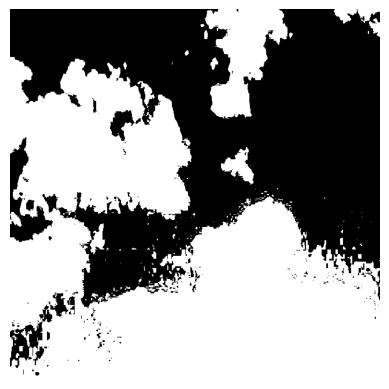

In [ ]:
# defining an identity kernel, will change nothing because each pixel will remain with is value
kernel = np.matrix([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis("off")
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))


[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


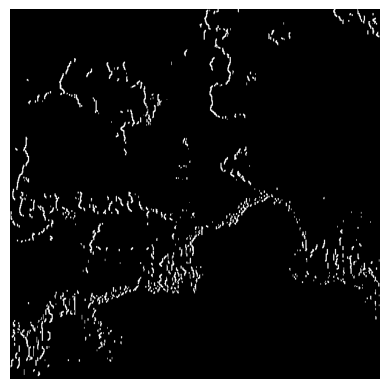

In [ ]:
# defining a vertical edge detection kernel
kernel = np.matrix([[-10, 0, 10], [-10, 0, 10], [-10, 0, 10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis("off")
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))


[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


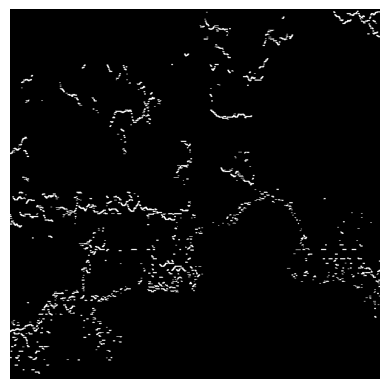

In [ ]:
# defining an horizontal edge detection kernel
kernel = np.matrix([[10, 10, 10], [0, 0, 0], [-10, -10, -10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis("off")
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))


In [ ]:
data_train_dir = "dataset/train"
data_valid_dir = "dataset/valid"

batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_train_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_valid_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

class_names = val_data.class_names
print(class_names)


Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory dataset/train. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
import pandas as pd
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split

# --- 1. Paramètres de configuration ---
# Assurez-vous que ces chemins sont corrects !
IMG_DIR = "dataset/train/"  # Le dossier contenant TOUTES vos images
CSV_PATH = "dataset/train/_classes.csv"
IMG_HEIGHT = 200
IMG_WIDTH = 200
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 42

# --- 2. Charger les données depuis le CSV avec Pandas ---
try:
    df = pd.read_csv(CSV_PATH)
    # On suppose que la première colonne est le nom du fichier et les suivantes sont les labels
    # Renommer la première colonne pour plus de clarté
    df.rename(columns={df.columns[0]: "filename"}, inplace=True)
    print("Aperçu du DataFrame chargé :")
    print(df.head())
except FileNotFoundError:
    print(f"ERREUR : Le fichier CSV n'a pas été trouvé à l'emplacement : {CSV_PATH}")
    # Arrêtez l'exécution ou gérez l'erreur ici

# --- 3. Préparer les chemins d'images et les labels ---
# Créer le chemin complet pour chaque image
# La fonction os.path.join est la manière la plus sûre de construire des chemins
df["full_path"] = df["filename"].apply(lambda name: os.path.join(IMG_DIR, name))

# Extraire les chemins et les labels
image_paths = df["full_path"].values
# .values transforme les colonnes du DataFrame en un tableau NumPy
# On prend toutes les colonnes SAUF 'filename' et 'full_path'
labels = df.drop(columns=["filename", "full_path"]).values
class_names = df.drop(columns=["filename", "full_path"]).columns.tolist()

print(f"\n{len(image_paths)} images trouvées.")
print(f"Les classes sont : {class_names}")


# --- 4. Diviser en ensembles d'entraînement et de validation ---
# Utilisation de scikit-learn pour une division stratifiée et robuste
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths,
    labels,
    test_size=VALIDATION_SPLIT,
    random_state=SEED,
    # Si vos classes sont déséquilibrées, ajoutez stratify=labels
)

print(f"\nTaille de l'ensemble d'entraînement : {len(train_paths)}")
print(f"Taille de l'ensemble de validation : {len(val_paths)}")


# --- 5. Créer la fonction de chargement et de prétraitement ---
def load_and_preprocess_image(path, label):
    """Charge une image depuis un chemin, la décode, la redimensionne et la normalise."""
    # Lire le fichier binaire
    img_bytes = tf.io.read_file(path)
    # Décoder en un tenseur. Utilisez decode_jpeg, decode_png, etc. selon votre format.
    # decode_image gère plusieurs formats automatiquement.
    img = tf.io.decode_image(img_bytes, channels=3, expand_animations=False)
    # Redimensionner à la taille souhaitée
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    # Normaliser les valeurs des pixels entre 0 et 1 (pratique standard)
    img = img / 255.0
    return img, label


# --- 6. Construire les pipelines tf.data ---
AUTOTUNE = tf.data.AUTOTUNE


def create_dataset(paths, labels):
    # Créer un dataset de paires (chemin, label)
    path_label_ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    # Appliquer la fonction de chargement à chaque élément
    image_label_ds = path_label_ds.map(
        load_and_preprocess_image, num_parallel_calls=AUTOTUNE
    )
    return image_label_ds


# Création des datasets finaux
train_dataset = create_dataset(train_paths, train_labels)
val_dataset = create_dataset(val_paths, val_labels)

# Appliquer le batching, le brassage (shuffle) et le prefetching pour la performance
train_data = (
    train_dataset.shuffle(buffer_size=len(train_paths))
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=AUTOTUNE)
)
val_data = val_dataset.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

# --- 7. Utilisation ---
print(
    "\nLes datasets `train_data` et `val_data` sont prêts à être utilisés pour l'entraînement."
)
# Exemple : model.fit(train_data, validation_data=val_data, epochs=10)


Aperçu du DataFrame chargé :
                                            filename  altocumulus  \
0  Cb-N203_jpg.rf.eedff9fa0d468da939b1e626325c417...            0   
1  Sc-89-_jpg.rf.eedbfdfee150f3dc414e6731e77b7df8...            0   
2  Ns-N036_jpg.rf.ee277122a996efb89fd3a247bd91442...            0   
3  Ci-N022_jpg.rf.f14a1141448b1a0ff8b22f3babb3677...            0   
4  Ci-N009_jpg.rf.f0e6d8c370e4c9d81b20438a49da165...            0   

   altostratus  cirrocumulus  cirrostratus  cirrus  cumulonimbus  cumulus  \
0            0             0             0       0             1        0   
1            0             0             0       0             0        0   
2            0             0             0       0             0        0   
3            0             0             0       1             0        0   
4            0             0             0       1             0        0   

   nimbostratus  stratocumulus  stratus  
0             0              0        0  
1        

In [24]:
import pandas as pd
import tensorflow as tf
import os

# --- 1. Paramètres de configuration ---
# Assurez-vous que ces chemins sont corrects pour votre projet
TRAIN_DIR = "dataset/train/"
VALID_DIR = "dataset/valid/"  # ou "dataset/validation/" selon votre nom de dossier
TRAIN_CSV_PATH = os.path.join(TRAIN_DIR, "_classes.csv")
VALID_CSV_PATH = os.path.join(VALID_DIR, "_classes.csv")

IMG_HEIGHT = 200
IMG_WIDTH = 200
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE


# --- 2. Fonction de chargement et de prétraitement d'une image ---
# Cette fonction ne change pas
def load_and_preprocess_image(path, label):
    """Charge une image depuis un chemin, la décode, la redimensionne et la normalise."""
    img_bytes = tf.io.read_file(path)
    img = tf.io.decode_image(img_bytes, channels=3, expand_animations=False)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    # img = img / 255.0  # On normalise !
    return img, label


# --- 3. Fonction réutilisable pour créer un dataset depuis un dossier et un CSV ---
def create_dataset_from_csv(image_dir, csv_path, batch_size, is_training=True):
    """
    Crée un tf.data.Dataset complet à partir d'un dossier d'images et d'un fichier CSV.

    Args:
        image_dir (str): Chemin vers le dossier contenant les images.
        csv_path (str): Chemin vers le fichier CSV contenant les noms et labels.
        batch_size (int): Taille des lots (batchs).
        is_training (bool): Si True, le dataset sera mélangé (shuffle).

    Returns:
        tf.data.Dataset: Le dataset final, prêt pour l'entraînement ou la validation.
        list: La liste des noms de classes.
    """
    # Lire le fichier CSV
    df = pd.read_csv(csv_path)
    df.rename(columns={df.columns[0]: "filename"}, inplace=True)

    # Créer les chemins complets vers les images
    df["full_path"] = df["filename"].apply(lambda name: os.path.join(image_dir, name))

    # Extraire les chemins et les labels
    image_paths = df["full_path"].values
    label_columns = df.drop(columns=["filename", "full_path"])
    labels = label_columns.values
    class_names = label_columns.columns.tolist()

    print(
        f"Chargement depuis '{image_dir}': {len(image_paths)} images trouvées pour les classes {class_names}."
    )

    # Créer le dataset de base (chemins, labels)
    path_label_ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    # Appliquer la fonction de chargement et de prétraitement
    image_label_ds = path_label_ds.map(
        load_and_preprocess_image, num_parallel_calls=AUTOTUNE
    )

    # Appliquer le brassage (shuffle) SEULEMENT pour l'ensemble d'entraînement
    if is_training:
        # La taille du buffer est souvent fixée à la taille totale du dataset
        # pour un brassage complet
        image_label_ds = image_label_ds.shuffle(buffer_size=len(image_paths))

    # Appliquer le batching et le prefetching
    final_dataset = image_label_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

    return final_dataset, class_names


# --- 4. Créer les datasets d'entraînement et de validation ---
print("Création du dataset d'entraînement...")
train_data, class_names = create_dataset_from_csv(
    image_dir=TRAIN_DIR,
    csv_path=TRAIN_CSV_PATH,
    batch_size=BATCH_SIZE,
    is_training=True,  # Important : on mélange les données d'entraînement
)

print("\nCréation du dataset de validation...")
val_data, _ = create_dataset_from_csv(
    image_dir=VALID_DIR,
    csv_path=VALID_CSV_PATH,
    batch_size=BATCH_SIZE,
    is_training=False,  # Important : on ne mélange JAMAIS les données de validation
)

# --- 5. Utilisation ---
print("\nLes datasets `train_data` et `val_data` sont prêts à être utilisés.")
print(f"Les classes détectées sont : {class_names}")
print("AUTOTUNE", AUTOTUNE)

# Votre modèle peut maintenant être entraîné avec ces datasets :
# model.fit(train_data, validation_data=val_data, epochs=10)

Création du dataset d'entraînement...
Chargement depuis 'dataset/train/': 1502 images trouvées pour les classes ['altocumulus', 'altostratus', 'cirrocumulus', 'cirrostratus', 'cirrus', 'cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus'].

Création du dataset de validation...
Chargement depuis 'dataset/valid/': 145 images trouvées pour les classes ['altocumulus', 'altostratus', 'cirrocumulus', 'cirrostratus', 'cirrus', 'cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus'].

Les datasets `train_data` et `val_data` sont prêts à être utilisés.
Les classes détectées sont : ['altocumulus', 'altostratus', 'cirrocumulus', 'cirrostratus', 'cirrus', 'cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus']
AUTOTUNE -1


In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

num_classes = 10

model = tf.keras.Sequential(
    [
        # Note: la couche Rescaling (1./255) a été intégrée dans le pipeline de données,
        # il n'est plus nécessaire de l'avoir dans le modèle.
        # Bloc 1
        tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        # Bloc 1
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        # Bloc 2
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        # Bloc 3
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        # Couches de classification
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    # loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)

logdir = "logs"

# tensorboard_callback = keras.callbacks.TensorBoard(
#     log_dir=logdir, histogram_freq=1, write_images=logdir, embeddings_data=train_data
# )

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=logdir, histogram_freq=1, write_graph=True, write_images=True
)

model.fit(
    train_data, validation_data=val_data, epochs=20, callbacks=[tensorboard_callback]
)


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 647ms/step - accuracy: 0.1652 - loss: 3.5084 - val_accuracy: 0.1103 - val_loss: 4.0534
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 650ms/step - accuracy: 0.2330 - loss: 2.0813 - val_accuracy: 0.1103 - val_loss: 5.4506
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 657ms/step - accuracy: 0.2754 - loss: 1.9710 - val_accuracy: 0.1103 - val_loss: 6.1479
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 659ms/step - accuracy: 0.3712 - loss: 1.7918 - val_accuracy: 0.1448 - val_loss: 3.4596
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 652ms/step - accuracy: 0.4126 - loss: 1.6295 - val_accuracy: 0.1931 - val_loss: 3.9550
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 643ms/step - accuracy: 0.4375 - loss: 1.5171 - val_accuracy: 0.2552 - val_loss: 3.0969
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.5482 - loss: 1.2349 - val_accuracy: 0.2690 - val_loss: 2.9965
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 633ms/step - accuracy: 0.5306 - loss: 1.1925 - val_accura

In [ ]:
# 1. Création d'un modèle de data augmentation
# 1. Création d'une "couche" de data augmentation
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

# 2. Ajout de la data augmentation au début du modèle principal
model = tf.keras.Sequential(
    [
        # Note: la couche Rescaling (1./255) a été intégrée dans le pipeline de données,
        # il n'est plus nécessaire de l'avoir dans le modèle.
        # Bloc 1
        tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        data_augmentation,
        layers.Rescaling(1.0 / 255),  # 2. Normaliser les pixels à [0, 1]
        # Bloc 1
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D(),
        # Bloc 2
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        # Couches de classification
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    # loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)

logdir = "logs"

# tensorboard_callback = keras.callbacks.TensorBoard(
#     log_dir=logdir, histogram_freq=1, write_images=logdir, embeddings_data=train_data
# )

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=logdir, histogram_freq=1, write_graph=True, write_images=True
)

# 3. Ajout du callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # La métrique à surveiller
    patience=5,  # Nombre d'époques sans amélioration avant d'arrêter
    restore_best_weights=True,  # Rétablit les poids du meilleur modèle à la fin
)

model.fit(
    train_data,
    validation_data=val_data,
    # On peut mettre un grand nombre d'époques, EarlyStopping s'arrêtera au bon moment
    epochs=50,
    # On ajoute le nouveau callback à la liste
    callbacks=[tensorboard_callback, early_stopping_callback],
)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.1902 - loss: 3.1011 - val_accuracy: 0.0759 - val_loss: 2.2784
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 411ms/step - accuracy: 0.2629 - loss: 2.0985 - val_accuracy: 0.2345 - val_loss: 2.2685
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 387ms/step - accuracy: 0.3101 - loss: 1.9373 - val_accuracy: 0.2345 - val_loss: 2.2424
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 396ms/step - accuracy: 0.3950 - loss: 1.8010 - val_accuracy: 0.1793 - val_loss: 2.2278
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 402ms/step - accuracy: 0.3819 - loss: 1.7706 - val_accuracy: 0.3034 - val_loss: 2.2082
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 397ms/step - accuracy: 0.4030 - loss: 1.7151 - val_accuracy: 0.2414 - val_loss: 2.1263
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 414ms/step - accuracy: 0.4412 - loss: 1.6593 - val_accuracy: 0.3241 - val_loss: 2.0939
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 401ms/step - accuracy: 0.4421 - loss: 1.6555 - val_accu

In [ ]:
# --- Utilisation du Transfer Learning avec MobileNetV2 ---

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

# 1. Charger le modèle de base pré-entraîné
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,  # Ne pas inclure le classifieur final d'ImageNet
    weights="imagenet",  # Charger les poids appris sur ImageNet
)

# 2. Geler les poids du modèle de base
base_model.trainable = False

# 3. Construire le nouveau modèle en ajoutant notre propre classifieur
inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = data_augmentation(inputs)
# MobileNetV2 a sa propre fonction de pré-traitement, nous utilisons celle-ci
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)  # Important de le mettre en mode inférence
x = layers.GlobalAveragePooling2D()(x)  # Aplatit les features de manière intelligente
x = layers.Dropout(0.2)(x)  # Un peu de régularisation
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

# 2. Création d'un optimiseur avec un taux d'apprentissage plus faible
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001
)  # On peut souvent utiliser un lr plus élevé ici

model.compile(
    optimizer=optimizer,
    # loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)

logdir = "logs"

# tensorboard_callback = keras.callbacks.TensorBoard(
#     log_dir=logdir, histogram_freq=1, write_images=logdir, embeddings_data=train_data
# )

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=logdir, histogram_freq=1, write_graph=True, write_images=True
)

# 3. Ajout du callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # La métrique à surveiller
    patience=5,  # Nombre d'époques sans amélioration avant d'arrêter
    restore_best_weights=True,  # Rétablit les poids du meilleur modèle à la fin
)

model.fit(
    train_data,
    validation_data=val_data,
    # On peut mettre un grand nombre d'époques, EarlyStopping s'arrêtera au bon moment
    epochs=50,
    # On ajoute le nouveau callback à la liste
    callbacks=[tensorboard_callback, early_stopping_callback],
)


/var/folders/gp/0vlcn3wx6518r6gq6nh8vyvw0000gn/T/ipykernel_8703/2773091815.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.1644 - loss: 2.4318 - val_accuracy: 0.3862 - val_loss: 1.6332
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - accuracy: 0.4641 - loss: 1.5690 - val_accuracy: 0.5034 - val_loss: 1.3674
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.5186 - loss: 1.3880 - val_accuracy: 0.5379 - val_loss: 1.2592
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.6009 - loss: 1.1828 - val_accuracy: 0.5448 - val_loss: 1.2275
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.6214 - loss: 1.1684 - val_accuracy: 0.5655 - val_loss: 1.1386
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.6174 - loss: 1.1042 - val_accuracy: 0.5862 - val_loss: 1.0948
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.6613 - loss: 0.9768 - val_accuracy: 0.6069 - val_loss: 1.0649
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/

## Fine-tunning

In [ ]:
# --- ÉTAPE DE FINE-TUNING ---

print("\n--- Début de la phase de Fine-Tuning ---")

# 1. Dégeler le modèle de base
base_model.trainable = True

# 2. Dégeler uniquement les dernières couches
# Gardons les 100 premières couches gelées et dégelons le reste.
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# 3. Re-compiler le modèle avec un taux d'apprentissage très faible
# Ceci est CRUCIAL pour ne pas détruire les poids pré-entraînés.
optimizer_fine_tune = tf.keras.optimizers.Adam(
    learning_rate=1e-5
)  # 100x plus petit qu'avant

model.compile(
    optimizer=optimizer_fine_tune,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)

# 4. Continuer l'entraînement pour quelques époques
# On commence à partir de l'époque où le premier entraînement s'est arrêté.
# Par exemple, si le premier s'est arrêté à 16, on peut faire de 16 à 26.
# Ou plus simplement, on peut le laisser continuer pour 10 époques de plus.
fine_tune_epochs = 10
total_epochs = (
    16 + fine_tune_epochs
)  # Suppose que le premier entraînement s'est arrêté à 16

history_fine_tune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=total_epochs,
    initial_epoch=16,  # Important: on reprend là où on s'est arrêté
    callbacks=[
        tensorboard_callback,
        early_stopping_callback,
    ],  # Les mêmes callbacks sont valides
)



--- Début de la phase de Fine-Tuning ---
Epoch 17/26
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 378ms/step - accuracy: 0.4271 - loss: 1.7392 - val_accuracy: 0.6621 - val_loss: 0.9252
Epoch 18/26
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 362ms/step - accuracy: 0.4739 - loss: 1.5522 - val_accuracy: 0.6759 - val_loss: 0.9399
Epoch 19/26
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 373ms/step - accuracy: 0.5393 - loss: 1.3853 - val_accuracy: 0.6483 - val_loss: 0.9733
Epoch 20/26
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 379ms/step - accuracy: 0.5867 - loss: 1.2704 - val_accuracy: 0.6483 - val_loss: 0.9946
Epoch 21/26
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 371ms/step - accuracy: 0.6008 - loss: 1.1735 - val_accuracy: 0.6621 - val_loss: 1.0012
Epoch 22/26
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 361ms/step - accuracy: 0.6130 - loss: 1.1187 - val_accuracy: 0.6690 - val_loss: 1.0158


In [31]:
# Sauvegarder le modèle complet au format natif de Keras v3
model.save("mon_super_modele_classification_nuages.keras")

print("Modèle sauvegardé avec succès !")

Modèle sauvegardé avec succès !


In [34]:
import tensorflow as tf
import numpy as np
from PIL import Image

# --- Chargement et Prédiction ---

# 1. Recharger le modèle sauvegardé
# Assurez-vous d'avoir les variables IMG_HEIGHT et IMG_WIDTH définies comme avant
IMG_HEIGHT = 200
IMG_WIDTH = 200
loaded_model = tf.keras.models.load_model(
    "mon_super_modele_classification_nuages.keras"
)

# La liste des classes doit être dans le même ordre que pendant l'entraînement
# class_names = ['classe_0', 'classe_1', 'classe_2', 'classe_3', 'classe_4',
#                'classe_5', 'classe_6', 'classe_7', 'classe_8', 'classe_9'] # Remplacez par vos vrais noms de classe

class_names = [
    "altocumulus",
    "altostratus",
    "cirrocumulus",
    "cirrostratus",
    "cirrus",
    "cumulonimbus",
    "cumulus",
    "nimbostratus",
    "stratocumulus",
    "stratus",
]


# 2. Préparer une nouvelle image pour la prédiction
def prepare_image(image_path):
    """Charge une image et la prépare pour le modèle."""
    img = tf.keras.utils.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.utils.img_to_array(img)
    # Ajouter une dimension de lot (batch) car le modèle s'attend à un lot d'images
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded


# Mettez ici le chemin vers une image que vous voulez tester
image_a_tester_path = "/Users/corentinpradier/Desktop/Clouds_classification/dataset/test/Sc-N198_jpg.rf.499e5646acad94b7cdb82e3dcd8f83f6.jpg"
prepped_image = prepare_image(image_a_tester_path)

# 3. Faire la prédiction
predictions = loaded_model.predict(prepped_image)
score = tf.nn.softmax(
    predictions[0]
)  # Appliquer Softmax pour obtenir des probabilités claires

# 4. Afficher le résultat
predicted_class_index = np.argmax(score)
confidence = 100 * np.max(score)
predicted_class_name = class_names[predicted_class_index]

print(
    f"Cette image est très probablement un(e) '{predicted_class_name}' "
    f"avec une confiance de {confidence:.2f}%."
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
Cette image est très probablement un(e) 'stratocumulus' avec une confiance de 15.36%.
